In [25]:
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
# Suppress warning
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

from dingo.gw.result import Result
from dingo.core.utils.plotting import plot_corner_multi

## Tutorial: Inference with DINGO-T1
This tutorial illustrates how to perform inference on the event GW190701_20336 with different detector configurations (H vs. HL. vs HLV) and visualize the resulting posterior distributions.
While 100,000 posterior samples were drawn for the results shown in the paper, we only generate 10,000 samples in this tutorial to speed up inference. This can be easily adjusted in the settings files.

The final plot will look similar to this:

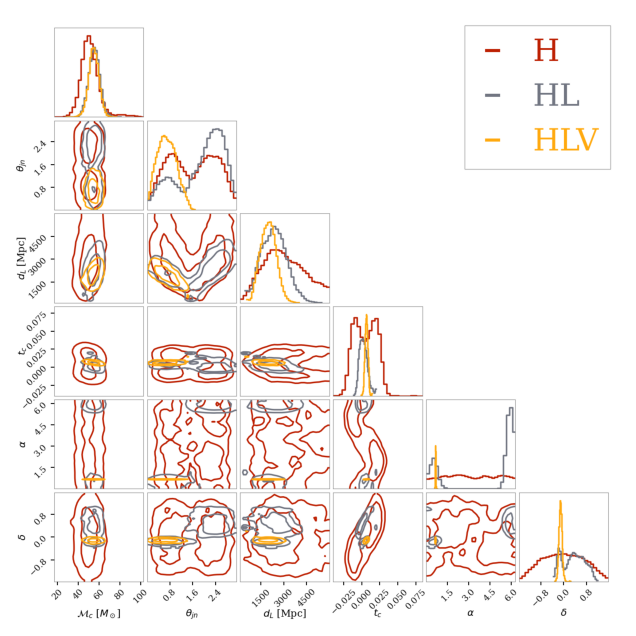

In [31]:
img = Image.open('../00_figures/corner_plot_comparison_GW190701_203306_H_vs_HL_vs_HLV.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off');

### 1. Download model from Zenodo
As a first step, we have to download the DINGO-T1 model from [Zenodo](https://zenodo.org/records/17726076) via:

In [16]:
!pip install zenodo_get

In [17]:
%pwd # Check that the models are saved into the folder /02_inference_with_pretrained_models, you might need to adjust the path.

'/Users/akofler/Desktop/gravitational_waves/papers/01_dingo_transformer/04_tutorial/dingo-T1/02_inference_with_pretrained_model'

In [18]:
!zenodo_get 17726076

Title: DINGO-T1 model for "Flexible Gravitational-Wave Parameter Estimation with Transformers"
Keywords: 
Publication date: 2025-11-26
DOI: 10.5281/zenodo.17726076
Total size: 1.1 GB

File: dingo_t1.pt (640.9 MB)
Link: https://zenodo.org/api/records/17726076/files/dingo_t1.pt/content
dingo_t1.pt is already downloaded correctly.

File: dingo_baseline.pt (458.0 MB)
Link: https://zenodo.org/api/records/17726076/files/dingo_baseline.pt/content
dingo_baseline.pt is already downloaded correctly.

All specified files have been processed.


### 2. Run inference with `dingo_pipe`
Using the `.ini` files in the directory `/events/GW190701_203306`, we can run `dingo_pipe` via:

In [5]:
!dingo_pipe events/GW190701_203306/H1/GW190701_203306.ini

14:25 dingo_pipe INFO    : Loading dingo model from dingo_t1.pt in order to access settings.
/Users/akofler/Desktop/gravitational_waves/code/dingo-development/dingo/core/utils/backward_compatibility.py:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please 

Depending on the directory where the jupyter server was started, you might need to adjust your path in the `.ini` files and when loading the result.

In [2]:
# Adjust path as needed
result_h = Result(file_name="events/GW190701_203306/H1/result/GW190701_203306_data0_1246048404-56_importance_sampling.hdf5")
result_h.print_summary()

Loading dataset from events/GW190701_203306/H1/result/GW190701_203306_data0_1246048404-56_importance_sampling.hdf5.
Number of samples: 10000
Log(evidence): -2922.486 +- 0.012
Effective samples 4139.0: (Sample efficiency = 41.39%)


As expected, we obtain a high sample efficiency, since this is a single-detector event with a broad posterior distribution which makes it easier to learn for DINGO-T1.

Since we want to compare posteriors across detector configurations, we will run dingo_pipe for HL and HLV as well:

In [12]:
!dingo_pipe events/GW190701_203306/H1_L1/GW190701_203306.ini

14:37 dingo_pipe INFO    : Loading dingo model from dingo_t1.pt in order to access settings.
/Users/akofler/Desktop/gravitational_waves/code/dingo-development/dingo/core/utils/backward_compatibility.py:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please 

In [14]:
!dingo_pipe events/GW190701_203306/H1_L1_V1/GW190701_203306.ini

14:46 dingo_pipe INFO    : Loading dingo model from dingo_t1.pt in order to access settings.
/Users/akofler/Desktop/gravitational_waves/code/dingo-development/dingo/core/utils/backward_compatibility.py:67: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please 

### Load samples and visualize posterior

In [3]:
result_hl = Result(file_name="events/GW190701_203306/H1_L1/result/GW190701_203306_data0_1246048404-56_importance_sampling.hdf5")
result_hl.print_summary()

Loading dataset from events/GW190701_203306/H1_L1/result/GW190701_203306_data0_1246048404-56_importance_sampling.hdf5.
Number of samples: 10000
Log(evidence): -5654.950 +- 0.026
Effective samples 1256.0: (Sample efficiency = 12.56%)


In [4]:
result_hlv = Result(file_name="events/GW190701_203306/H1_L1_V1/result/GW190701_203306_data0_1246048404-56_importance_sampling.hdf5")
result_hlv.print_summary()

Loading dataset from events/GW190701_203306/H1_L1_V1/result/GW190701_203306_data0_1246048404-56_importance_sampling.hdf5.
Number of samples: 10000
Log(evidence): -8506.817 +- 0.019
Effective samples 2254.1: (Sample efficiency = 22.54%)


The sample efficiencies might deviate from the values reported in the paper since we do not draw enough samples to report a valid estimate of the sample efficiency and the efficiency will display a certain randomness.

In [13]:
h_samples = result_h.get_pesummary_samples()
hl_samples = result_hl.get_pesummary_samples()
hlv_samples = result_hlv.get_pesummary_samples()

# Subtract trigger time
event_times = [result_h.event_metadata["time_event"], result_hl.event_metadata["time_event"], result_hlv.event_metadata["time_event"]]
assert np.unique(event_times).size == 1
h_samples["geocent_time"] -= event_times[0]
hl_samples["geocent_time"] -= event_times[0]
hlv_samples["geocent_time"] -= event_times[0]

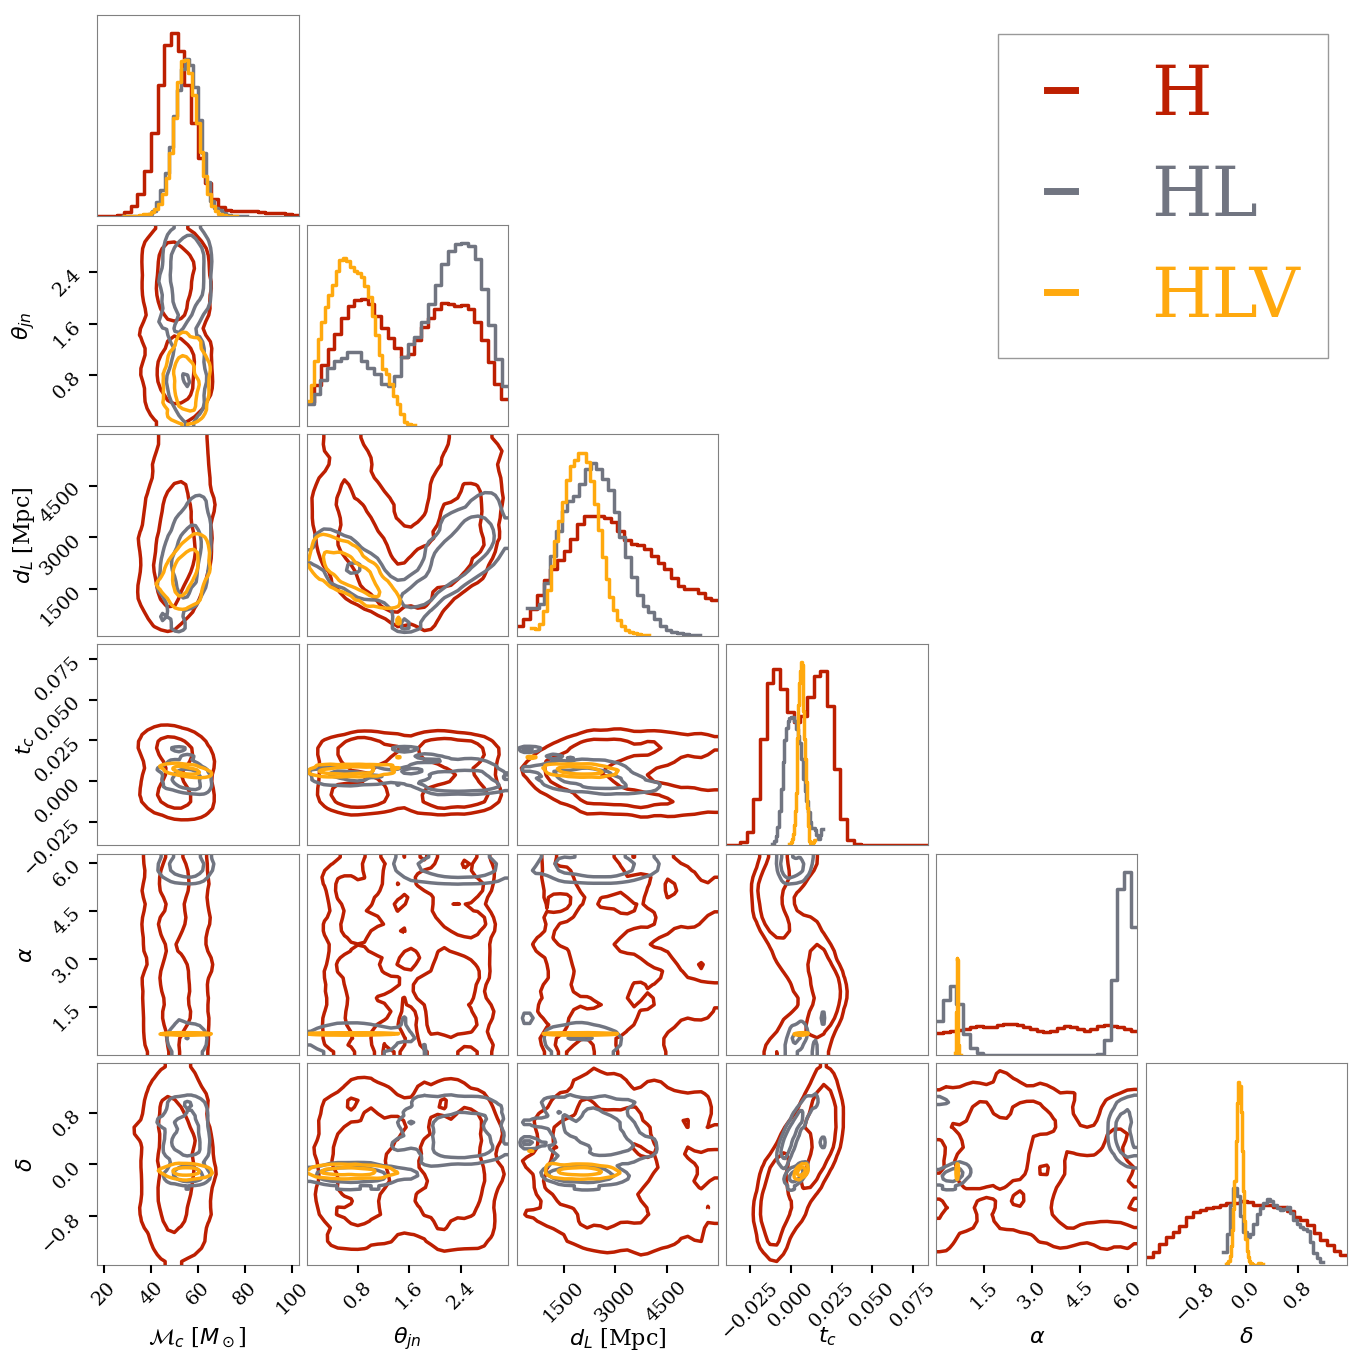

In [23]:
latex_labels_dict = {"chirp_mass": r"$\mathcal{M}_c$ [$M_\odot$]", "theta_jn": r"$\theta_{jn}$", "luminosity_distance": r"$d_L$ [Mpc]", "geocent_time": r"$t_c$", "ra": r"$\alpha$", "dec": r"$\delta$"}
params = list(latex_labels_dict.keys())
colors = ['#bd1f01', '#717581', '#ffa90e']

# Filename of the corner plot
out_file_name = "corner_plot_comparison_GW190701_203306_H_vs_HL_vs_HLV.png"

fig = plot_corner_multi(
    [h_samples[params], hl_samples[params], hlv_samples[params]],
    weights=[None, None, None],
    labels=["H", "HL", "HLV"],
    filename=out_file_name,
    latex_labels_dict=latex_labels_dict,
    colors=colors,
)

If you want to experiment further by changing the frequency ranges, you can do so my modifying:

**(1) Minimum frequency**:

`minimum-frequency = 50.0` (for all detectors) or `minimum-frequency = {'H1': 30, 'L1': 50, 'V1': 20}` (for individual detectors) (model trained with masking up to $f_\mathrm{min} = 180$Hz)

**(2) Maximum frequency**:

`maximum-frequency = 224.0` (for all detectors) or `maximum-frequency = {'H1': 224, 'L1': 448, 'V1': 896}` (for individual detectors) (model trained with masking as low as $f_\mathrm{max} = 80$Hz)

**(3) PSD notching**:

`suppress = {'V1': [46, 51]}` (model trained with a maximal suppress range of 10 Hz across the full frequency range of [20, 1810] Hz)